In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./seoul_5.csv')

In [2]:
df.head()

,gu_l,dong_l,used_y,square,per_cost_man,Price per squar,floor,top10,YN_r,YN_top10,s_c,Hospital,cost
0,0,8,32,77.75,1922.829582,2122.127392,7,0,1,1,1,0.0,149500
1,0,8,33,54.98,2619.134231,2122.127392,7,0,1,1,1,0.0,144000
2,0,8,33,79.97,2035.138177,2122.127392,7,0,1,1,1,0.0,162750
3,0,8,33,79.97,2000.750281,2122.127392,8,0,1,1,1,0.0,160000
4,0,8,33,79.97,1875.703389,2122.127392,5,0,1,1,1,0.0,150000


In [35]:
X = df.drop(['cost'], axis = 1)
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

In [4]:
from lightgbm import LGBMRegressor

In [5]:
%time
lgb = LGBMRegressor(linear_tree = True,
                   boosting_type = 'gbdt',
                   objective = 'regression',
                   n_estimators = 9000,
                   learning_rate = 0.001,
                   max_depth = 4,
                   n_jobs = -1)

lgb.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


LGBMRegressor(learning_rate=0.001, linear_tree=True, max_depth=4,
              n_estimators=9000, objective='regression')

In [6]:
MSE = mean_squared_error(y_test, lgb.predict(X_test))

In [7]:
from math import sqrt
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

MSE : 1829758.059959414
RMSE : 1352.6854992789026


In [8]:
lgb.feature_importances_

array([   88,   566,  3361, 62039, 58621,  1239,  1521,    51,   168,
          78,   483,     0], dtype=int32)

In [9]:
X.columns

Index(['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'Price per squar',
       'floor', 'top10', 'YN_r', 'YN_top10', 's_c', 'Hospital'],
      dtype='object')

/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 700x500 with 0 Axes>

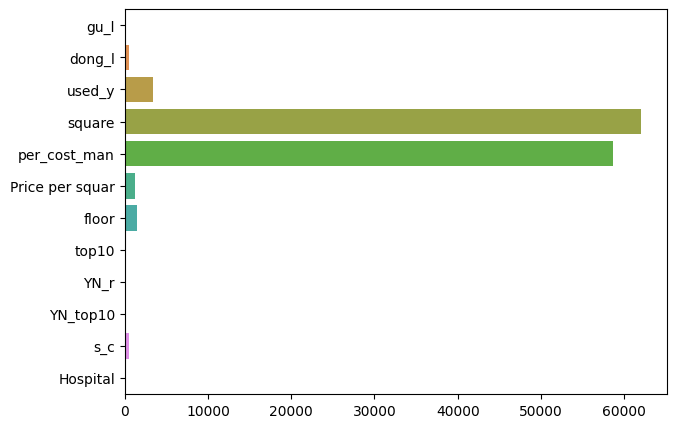

In [11]:
plt.figure(figsize=(7,5))
sns.barplot(lgb.feature_importances_,['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'Price per squar',
       'floor', 'top10', 'YN_r', 'YN_top10', 's_c', 'Hospital'])
plt.show()

In [12]:
lgb.predict(X_test)

array([61653.34578109, 95385.1443382 , 13022.96341205, ...,
       64174.72556671, 30008.49168428, 53337.2565952 ])

In [13]:
import joblib

joblib.dump(lgb, 'lgb_model.pkl')

['lgb_model.pkl']

In [14]:
lgb_from_joblib = joblib.load('lgb_model.pkl') 
lgb_from_joblib.predict(X_test)

array([61653.34578109, 95385.1443382 , 13022.96341205, ...,
       64174.72556671, 30008.49168428, 53337.2565952 ])

## 하위 2개 변수 삭제 후 다시 모델링
- 별 차이 없음..

In [26]:
df_1 = df.drop(['top10', 'Hospital'], axis=1)

In [21]:
df_1.head(1)

,gu_l,dong_l,used_y,square,per_cost_man,Price per squar,floor,YN_r,YN_top10,s_c,cost
0,0,8,32,77.75,1922.829582,2122.127392,7,1,1,1,149500


In [22]:
X = df_1.drop(['cost'], axis = 1)
y = df_1['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

In [23]:
%time
lgb = LGBMRegressor(linear_tree = True,
                   boosting_type = 'gbdt',
                   objective = 'regression',
                   n_estimators = 9000,
                   learning_rate = 0.001,
                   max_depth = 4,
                   n_jobs = -1)

lgb.fit(X_train, y_train)

MSE = mean_squared_error(y_test, lgb.predict(X_test))
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
MSE : 1830351.8187582497
RMSE : 1352.9049555524032


In [24]:
lgb.feature_importances_

array([  103,   567,  3362, 62127, 58549,  1258,  1527,   169,    78,
         483], dtype=int32)

## feature_importances 기준 200 밑의 변수들 삭제 후 다시 모델링

- 별 차이 없다..

In [27]:
df_2 = df.drop(['top10', 'Hospital','gu_l','YN_r','YN_top10'], axis=1)

In [28]:
df_2.head(1)

,dong_l,used_y,square,per_cost_man,Price per squar,floor,s_c,cost
0,8,32,77.75,1922.829582,2122.127392,7,1,149500


In [29]:
X = df_2.drop(['cost'], axis = 1)
y = df_2['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

In [30]:
%time
lgb = LGBMRegressor(linear_tree = True,
                   boosting_type = 'gbdt',
                   objective = 'regression',
                   n_estimators = 9000,
                   learning_rate = 0.001,
                   max_depth = 4,
                   n_jobs = -1)

lgb.fit(X_train, y_train)

MSE = mean_squared_error(y_test, lgb.predict(X_test))
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
MSE : 1837465.7173544266
RMSE : 1355.5315257692928


## 하이퍼 파라미터 튜닝

- 특성 선택에 별 영향이 없으므로 파라미터를 튜닝해서 다시 모델링

In [15]:
# 하이퍼 파라미터 튜닝
%time
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001],
    'max_depth' : [1,2,3,4]
}

grid_cv = GridSearchCV(lgb, param_grid = params, cv=4, scoring='neg_mean_squared_error', verbose=1)
grid_cv.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed: 25.8min finished


GridSearchCV(cv=4,
             estimator=LGBMRegressor(learning_rate=0.001, linear_tree=True,
                                     max_depth=4, n_estimators=9000,
                                     objective='regression'),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error', verbose=1)

In [16]:
print(f'최적의 하이퍼 파라미터 : {grid_cv.best_params_}')
print(f'예측 오차 : {grid_cv.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'max_depth': 4}
예측 오차 : -140939.36042289424


In [ ]:
X = df.drop(['cost'], axis = 1)
y = df['cost']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2,
                                                   random_state = 99)

In [36]:
%time
lgb_r = LGBMRegressor(linear_tree = True,
                   boosting_type = 'gbdt',
                   objective = 'regression',
                   n_estimators = 9000,
                   learning_rate = 0.1,
                   max_depth = 4,
                   n_jobs = -1)

lgb_r.fit(X_train, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


LGBMRegressor(linear_tree=True, max_depth=4, n_estimators=9000,
              objective='regression')

In [37]:
MSE = mean_squared_error(y_test, lgb_r.predict(X_test))

In [38]:
print(f'MSE : {MSE}')
print(f'RMSE : {sqrt(MSE)}')

MSE : 537552.7584483256
RMSE : 733.1798950109895


In [39]:
lgb_r.feature_importances_

array([ 2306,  6072,  9268, 38088, 42785,  2436, 11547,   849,   698,
         523,  1266,   735], dtype=int32)

In [40]:
X.columns

Index(['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'Price per squar',
       'floor', 'top10', 'YN_r', 'YN_top10', 's_c', 'Hospital'],
      dtype='object')

/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 700x500 with 0 Axes>

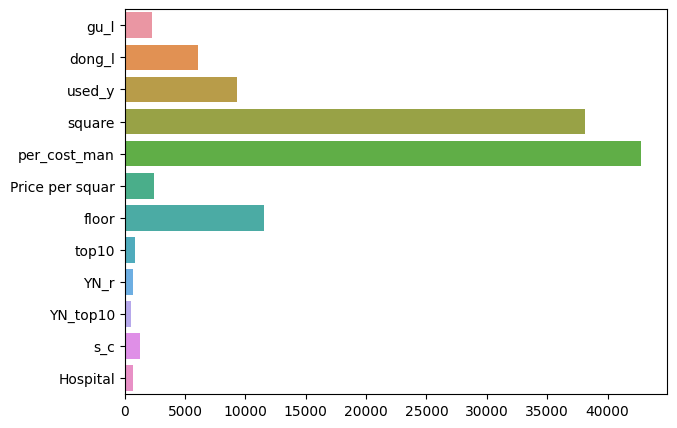

In [41]:
plt.figure(figsize=(7,5))
sns.barplot(lgb_r.feature_importances_,['gu_l', 'dong_l', 'used_y', 'square', 'per_cost_man', 'Price per squar',
       'floor', 'top10', 'YN_r', 'YN_top10', 's_c', 'Hospital'])
plt.show()

In [58]:
pred = lgb_r.predict(X_test)

In [63]:
pred

array([62496.67968628, 96005.28788484, 13981.8818354 , ...,
       64662.30045699, 29730.02776814, 53588.45829041])

In [62]:
pred[0]

62496.679686278745

In [60]:
y_test.iloc[0]

62500

In [43]:
joblib.dump(lgb_r, 'lgb_model_re.pkl')

['lgb_model_re.pkl']

In [44]:
lgb_re_from_joblib = joblib.load('lgb_model_re.pkl') 
lgb_re_from_joblib.predict(X_test)

array([62496.67968628, 96005.28788484, 13981.8818354 , ...,
       64662.30045699, 29730.02776814, 53588.45829041])